Heiti TC
Songti SC
Heiti TC
['序号', '学院', '原始总分', '新闻报道', '日常对话', '日常短文', '阅读1', '阅读2', '阅读3', '阅读4', '词汇知识', '语法知识', '语言应用', '语音语调准确度   &              话语连贯流利度', '语言准确度  &          可理解度', '话题内容广度    &          话题展开度 ', '交际互动活跃度     &           语言适切度', '内容', '结构', '语言', '交互']


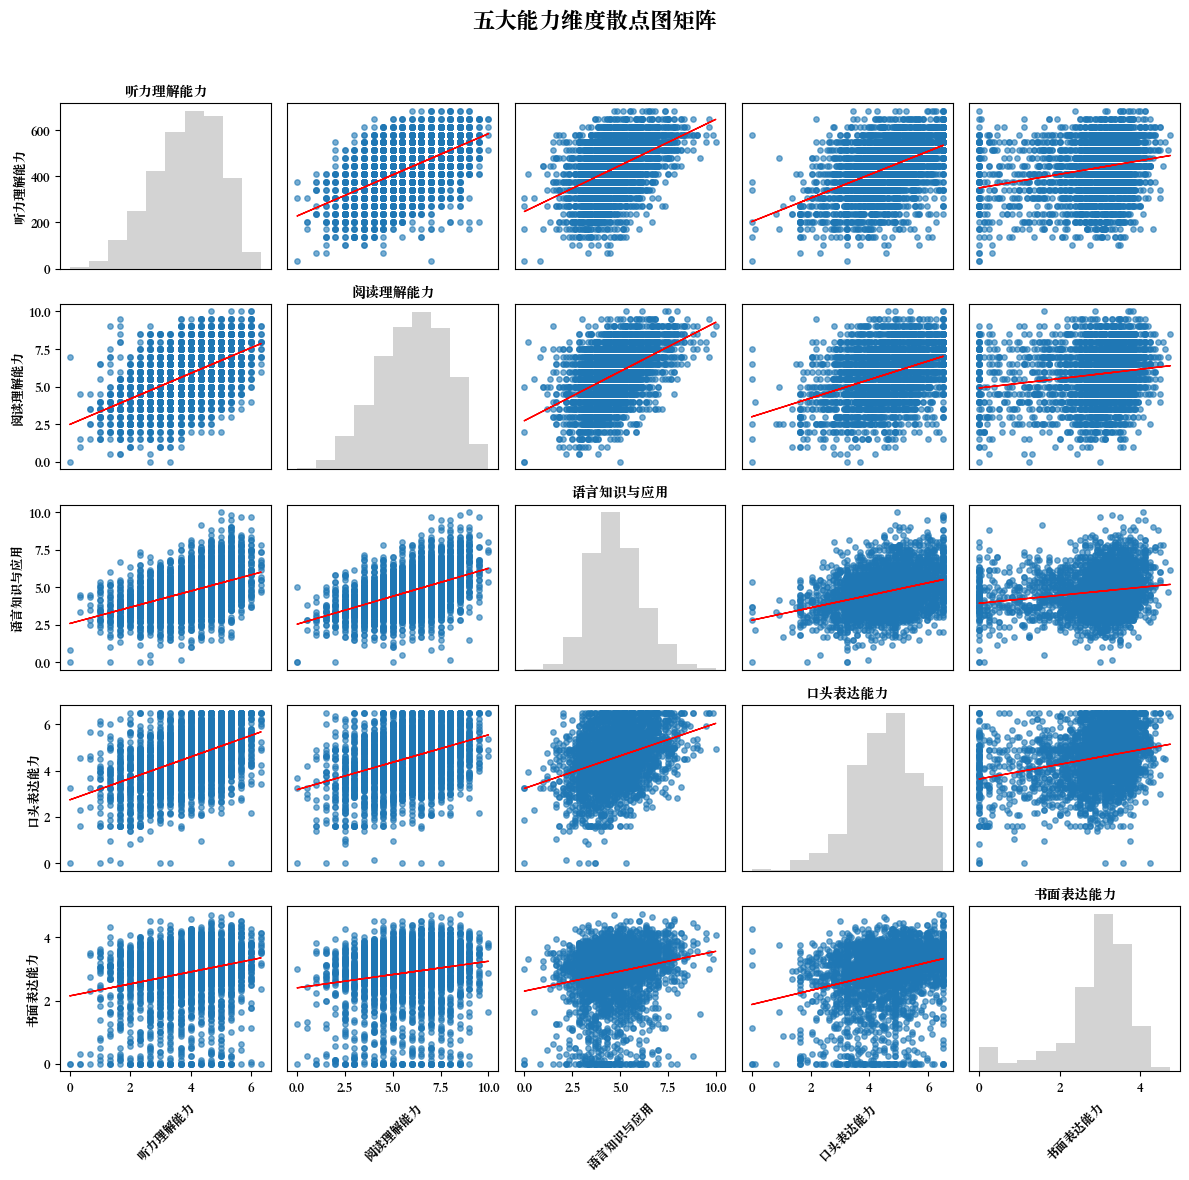

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体和负号正常显示
plt.rcParams['font.family'] = 'Songti SC'
import matplotlib.font_manager as fm
for font in fm.fontManager.ttflist:
    if 'Hei' in font.name or 'Ping' in font.name or 'Song' in font.name:
        print(font.name)
plt.rcParams['axes.unicode_minus'] = False

import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取原始数据
df = pd.read_excel("grade.xlsx")
print(df.columns.tolist())

# 2. 构造五大能力维度的平均分
df['听力理解能力'] = df[['新闻报道', '日常对话', '日常短文']].mean(axis=1)
df['阅读理解能力'] = df[['阅读1', '阅读2', '阅读3', '阅读4']].mean(axis=1)
df['语言知识与应用'] = df[['词汇知识', '语法知识', '语言应用']].mean(axis=1)
df['口头表达能力'] = df[['语音语调准确度   &              话语连贯流利度',
                     '语言准确度  &          可理解度',
                     '话题内容广度    &          话题展开度 ',
                     '交际互动活跃度     &           语言适切度']].mean(axis=1)
df['书面表达能力'] = df[['内容', '结构', '语言', '交互']].mean(axis=1)

# 3. 提取大类得分数据
cols = ['听力理解能力', '阅读理解能力', '语言知识与应用', '口头表达能力', '书面表达能力']
data = df[cols].dropna()
n = len(cols)

# 4. 创建散点图矩阵
fig, axes = plt.subplots(n, n, figsize=(12, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        if i == j:
            ax.hist(data[cols[i]], bins=10, color='lightgray')
            ax.set_title(cols[i], fontsize=10)
        else:
            ax.scatter(data[cols[j]], data[cols[i]], s=15, alpha=0.6)
            # 添加拟合直线
            x = data[cols[j]]
            y = data[cols[i]]
            coeffs = np.polyfit(x, y, deg=1)
            line = np.poly1d(coeffs)
            ax.plot(x, line(x), color='red', linewidth=1)

        if i == n - 1:
            ax.set_xlabel(cols[j], rotation=45, fontsize=9)
        else:
            ax.set_xticks([])

        if j == 0:
            ax.set_ylabel(cols[i], fontsize=9)
        else:
            ax.set_yticks([])

# 5. 显示图像
plt.suptitle("五大能力维度散点图矩阵", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


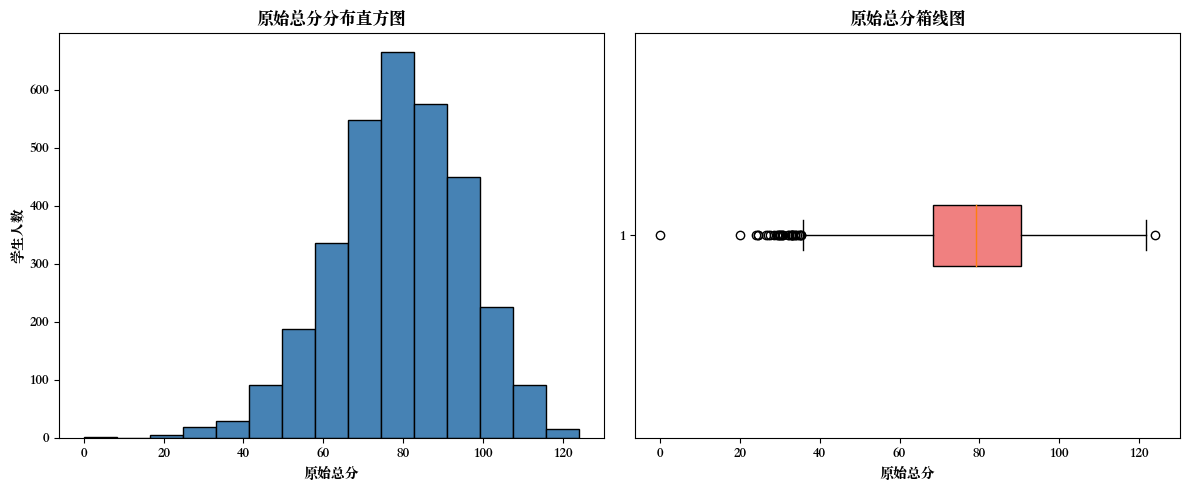

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Songti SC'

# 1. 读取数据
df = pd.read_excel("grade.xlsx")


# 2. 提取原始总分列
scores = df["原始总分"].dropna()

# 3. 创建图形
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 4. 直方图：显示集中趋势与分布形状
axes[0].hist(scores, bins=15, color='steelblue', edgecolor='black')
axes[0].set_title("原始总分分布直方图")
axes[0].set_xlabel("原始总分")
axes[0].set_ylabel("学生人数")

# 5. 箱线图：查看是否有异常值
axes[1].boxplot(scores, vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
axes[1].set_title("原始总分箱线图")
axes[1].set_xlabel("原始总分")

# 6. 显示图形
plt.tight_layout()
plt.show()

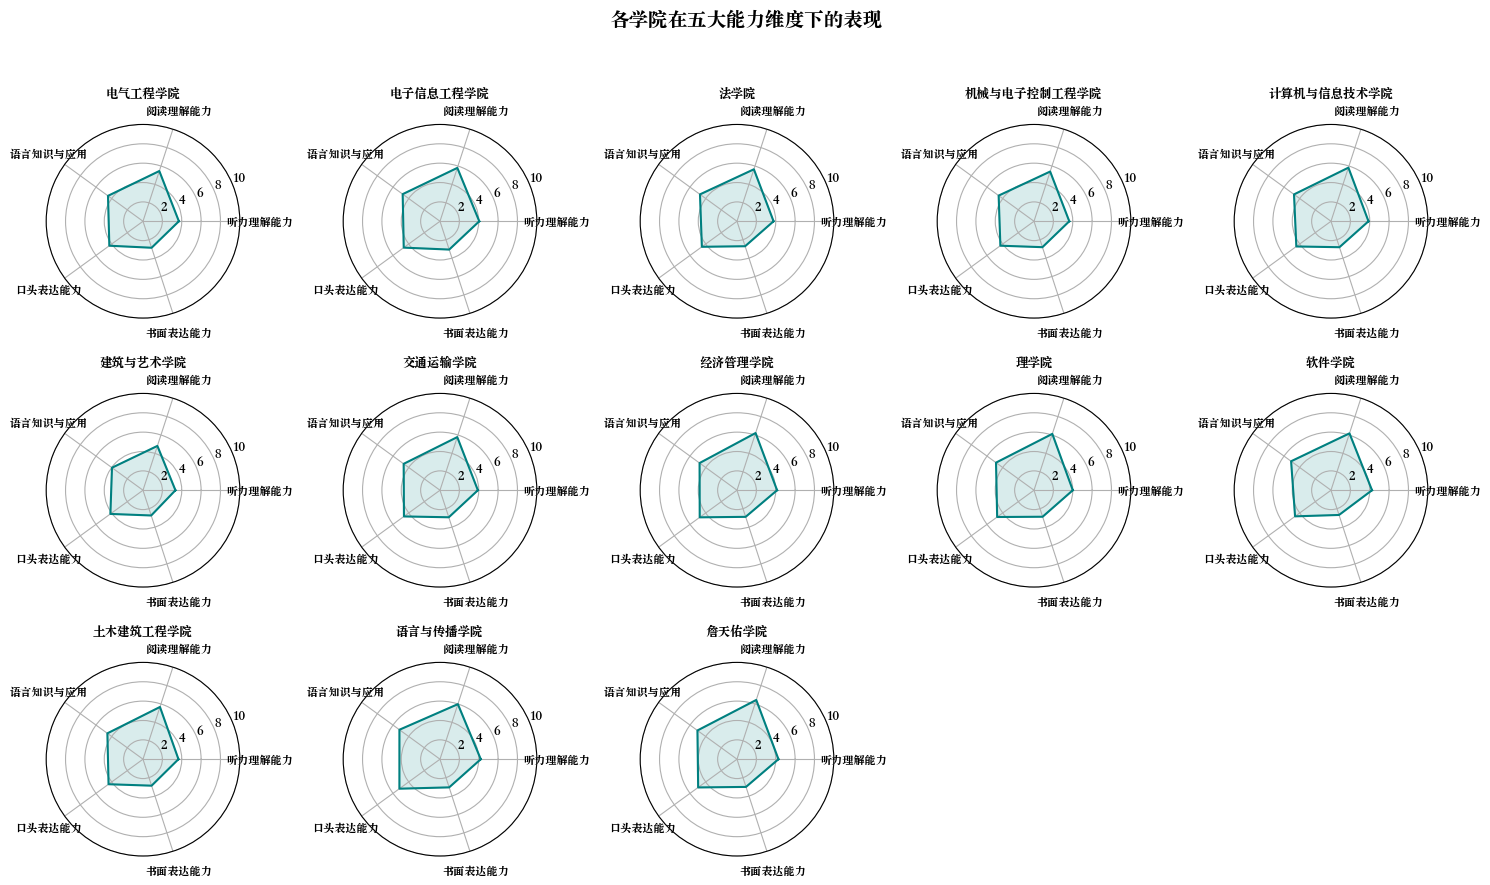

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 读取数据
df = pd.read_excel("grade.xlsx")

# 2. 构造能力维度
df['听力理解能力'] = df[['新闻报道', '日常对话', '日常短文']].mean(axis=1)
df['阅读理解能力'] = df[['阅读1', '阅读2', '阅读3', '阅读4']].mean(axis=1)
df['语言知识与应用'] = df[['词汇知识', '语法知识', '语言应用']].mean(axis=1)
df['口头表达能力'] = df[['语音语调准确度   &              话语连贯流利度',
                     '语言准确度  &          可理解度',
                     '话题内容广度    &          话题展开度 ',
                     '交际互动活跃度     &           语言适切度']].mean(axis=1)
df['书面表达能力'] = df[['内容', '结构', '语言', '交互']].mean(axis=1)

# 3. 准备数据
ability_cols = ['听力理解能力', '阅读理解能力', '语言知识与应用', '口头表达能力', '书面表达能力']
labels = np.array(ability_cols)

school_list = [
    '电气工程学院', '电子信息工程学院', '法学院', '机械与电子控制工程学院', '计算机与信息技术学院',
    '建筑与艺术学院', '交通运输学院', '经济管理学院', '理学院', '软件学院',
    '土木建筑工程学院', '语言与传播学院', '詹天佑学院'
]

school_group = df.groupby("学院")[ability_cols].mean()
school_group = school_group.loc[school_list].dropna()

# 4. 创建多个雷达图
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# 设置子图排布
num_schools = len(school_group)
cols = 5
rows = int(np.ceil(num_schools / cols))

fig = plt.figure(figsize=(cols * 3, rows * 3))

for idx, school in enumerate(school_group.index):
    ax = plt.subplot(rows, cols, idx + 1, polar=True)
    values = school_group.loc[school].tolist()
    values += values[:1]
    ax.plot(angles, values, color='teal')
    ax.fill(angles, values, color='teal', alpha=0.15)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=8)
    ax.set_title(school, fontsize=9)
    ax.set_rlim(0, 10)

# 总标题和排版
plt.suptitle("各学院在五大能力维度下的表现", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

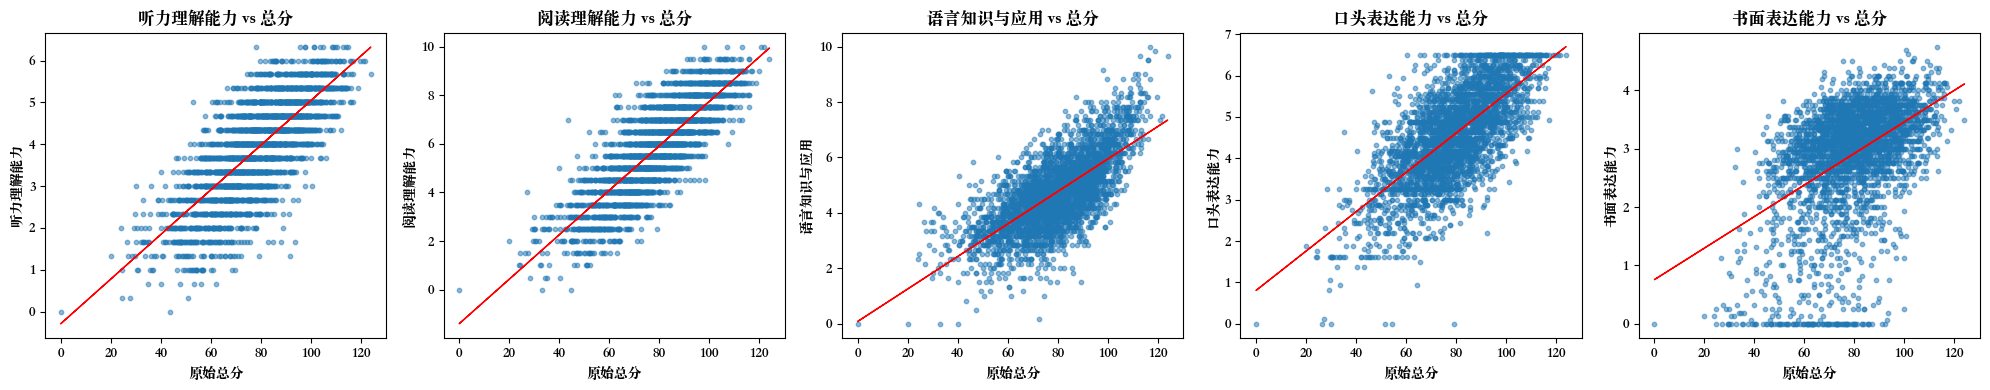

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取数据
df = pd.read_excel("grade.xlsx")

# 2. 构造五大能力维度的平均分
df['听力理解能力'] = df[['新闻报道', '日常对话', '日常短文']].mean(axis=1)
df['阅读理解能力'] = df[['阅读1', '阅读2', '阅读3', '阅读4']].mean(axis=1)
df['语言知识与应用'] = df[['词汇知识', '语法知识', '语言应用']].mean(axis=1)
df['口头表达能力'] = df[['语音语调准确度   &              话语连贯流利度',
                     '语言准确度  &          可理解度',
                     '话题内容广度    &          话题展开度 ',
                     '交际互动活跃度     &           语言适切度']].mean(axis=1)
df['书面表达能力'] = df[['内容', '结构', '语言', '交互']].mean(axis=1)

# 3. 绘制：总分 vs 每个能力维度
ability_cols = ['听力理解能力', '阅读理解能力', '语言知识与应用', '口头表达能力', '书面表达能力']

fig, axes = plt.subplots(1, len(ability_cols), figsize=(20, 4))

for i, col in enumerate(ability_cols):
    ax = axes[i]
    ax.scatter(df["原始总分"], df[col], alpha=0.5, s=10)
    ax.set_title(f"{col} vs 总分")
    ax.set_xlabel("原始总分")
    ax.set_ylabel(col)
    # 拟合线（可选）
    z = np.polyfit(df["原始总分"], df[col], 1)
    p = np.poly1d(z)
    ax.plot(df["原始总分"], p(df["原始总分"]), color='red', linewidth=1)

plt.tight_layout()
plt.show()

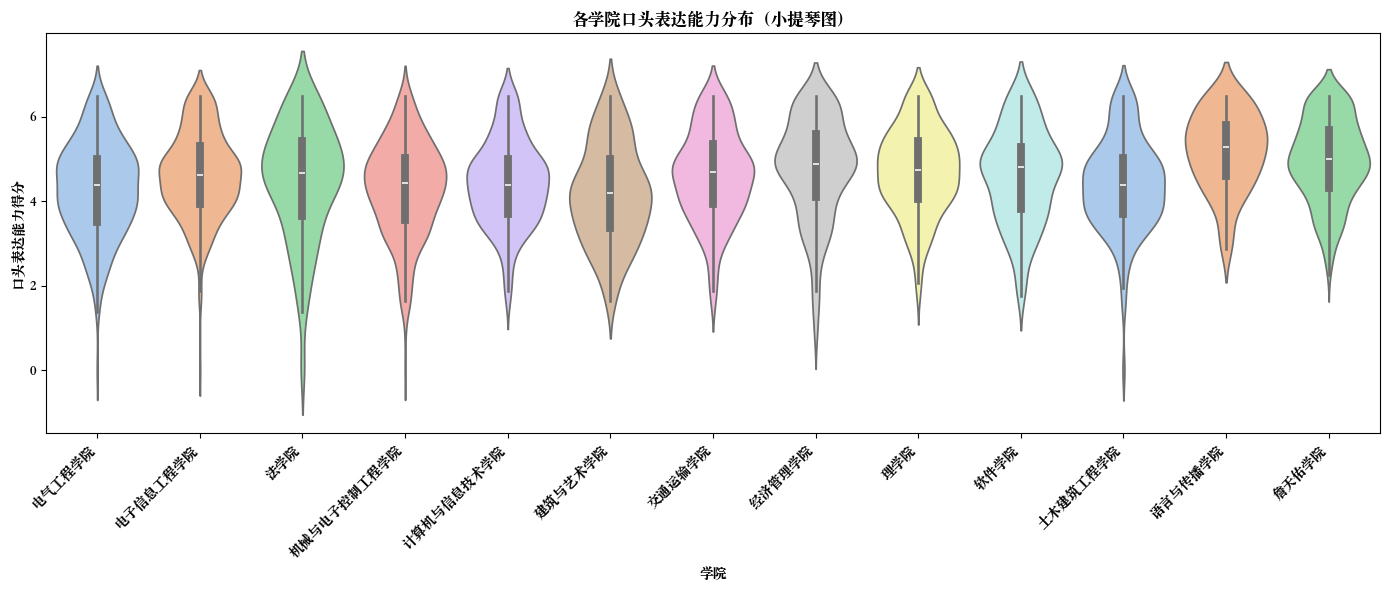

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns

# 设置中文显示
plt.rcParams['font.family'] = 'Songti SC'

# 1. 读取数据
df = pd.read_excel("grade.xlsx")

# 2. 构造五大能力维度
df['口头表达能力'] = df[['语音语调准确度   &              话语连贯流利度',
                     '语言准确度  &          可理解度',
                     '话题内容广度    &          话题展开度 ',
                     '交际互动活跃度     &           语言适切度']].mean(axis=1)

# 3. 绘图
plt.figure(figsize=(14, 6))
sns.violinplot(x="学院", y="口头表达能力", hue="学院", data=df, inner="box", palette="pastel", legend=False)

# 4. 美化
plt.xticks(rotation=45, ha='right')
plt.title("各学院口头表达能力分布（小提琴图）")
plt.ylabel("口头表达能力得分")
plt.xlabel("学院")
plt.tight_layout()
plt.show()